   Unnamed: 0  month  year       state  average_temp   
0           0      1  1950     Alabama          53.8  \
1           1      1  1950     Arizona          39.6   
2           2      1  1950    Arkansas          45.6   
3           3      1  1950  California          39.4   
4           4      1  1950    Colorado          25.2   

   monthly_mean_from_1901_to_2000  centroid_lon  centroid_lat  
0                            45.9    -86.828372     32.789832  
1                            41.1   -111.664418     34.293110  
2                            40.4    -92.439268     34.899745  
3                            42.7   -119.610699     37.246071  
4                            24.5   -105.547825     38.998552  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41856 entries, 0 to 41855
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      41856 non-nu

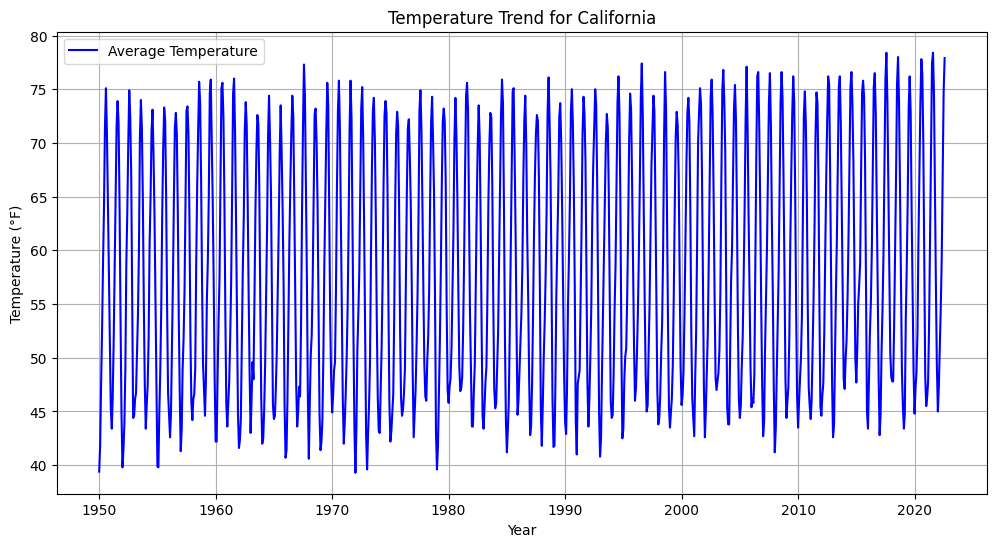

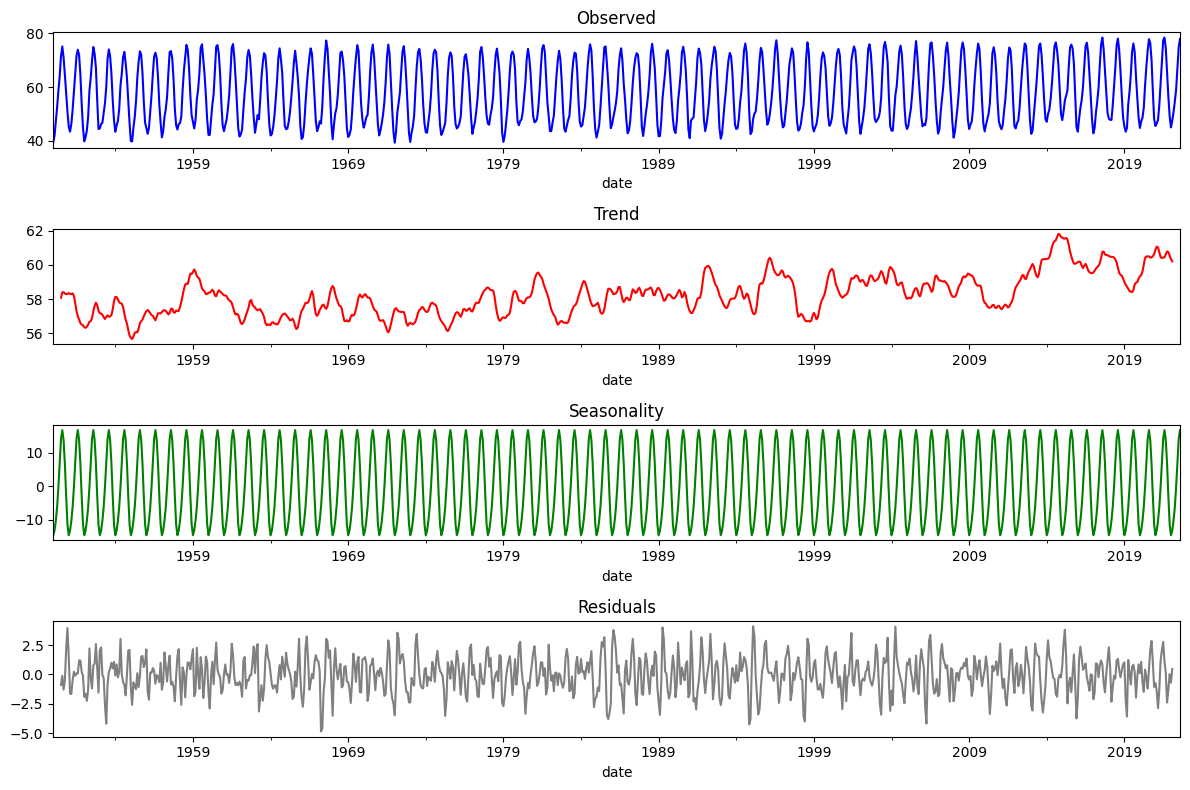

ADF Statistic: -3.3323725354350255
p-value: 0.01349199681204404
The data is stationary.
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4298.819, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9596.415, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4405.978, Time=0.36 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4296.952, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4778.897, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4298.656, Time=0.42 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=4296.690, Time=0.76 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=1.95 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=2.11 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                       average_temp   No. Observations:                  872
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1525.889
Date:                            Wed, 05 Mar 2025   AIC                           3061.778
Time:                                    20:21:28   BIC                           3085.557
Sample:                                01-01-1950   HQIC                          3070.882
                                     - 08-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4512      0.031    -14.453      0.000      -0.512      -0.390
ma.L1          0.9782      0.009   

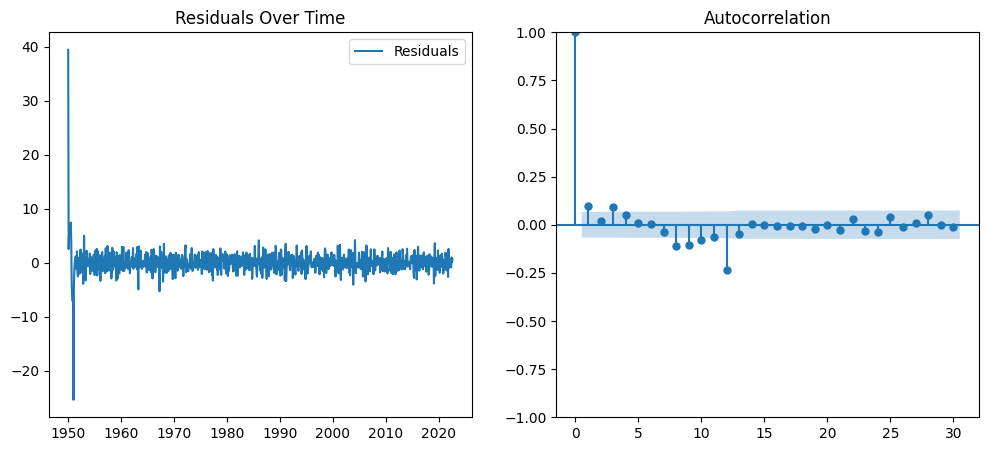

Shapiro-Wilk Test: Statistic=0.636384129524231, p-value=2.2311502174949024e-39
Residuals may not be normally distributed.


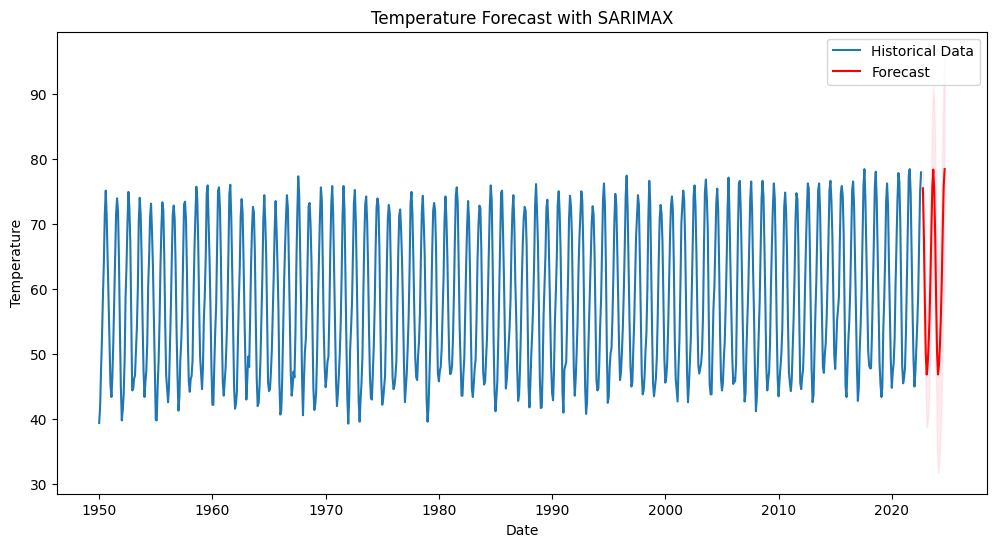

MAE: 1.3379158133266236, RMSE: 1.5949371471185918, MAPE: nan%


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima import auto_arima
from scipy.stats import shapiro

# Load Dataset
df = pd.read_csv("D:/Portfolio Projects/Climate Trend Analysis – Monthly Temperature Patterns/Data_/average_monthly_temperature_by_state_1950-2022.csv")

# Initial Data Exploration
def explore_data(df):
    print(df.head())
    print(df.info())
    print(df.isnull().sum())
    print(df.describe())

explore_data(df)

# Data Preprocessing
def preprocess_data(df):
    df.drop(columns=['Unnamed: 0'], inplace=True)
    df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
    df.set_index('date', inplace=True)
    return df

df = preprocess_data(df)
print(df.info())

# Select a Specific State
def filter_state(df, state_name):
    df_state = df[df["state"] == state_name].copy()
    df_state = df_state[["average_temp"]]
    df_state.sort_index(inplace=True)
    return df_state

state_name = "California"
df_state = filter_state(df, state_name)
print(df_state.head())

# Visualizing Temperature Trends
def plot_temperature_trend(df_state, state_name):
    plt.figure(figsize=(12, 6))
    plt.plot(df_state.index, df_state["average_temp"], label="Average Temperature", color="blue")
    plt.xlabel("Year")
    plt.ylabel("Temperature (°F)")
    plt.title(f"Temperature Trend for {state_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_temperature_trend(df_state, state_name)

# Seasonal Decomposition
def decompose_time_series(df_state):
    decomposition = seasonal_decompose(df_state["average_temp"], model="additive", period=12)
    fig, ax = plt.subplots(4, 1, figsize=(12, 8))
    decomposition.observed.plot(ax=ax[0], color="blue", title="Observed")
    decomposition.trend.plot(ax=ax[1], color="red", title="Trend")
    decomposition.seasonal.plot(ax=ax[2], color="green", title="Seasonality")
    decomposition.resid.plot(ax=ax[3], color="gray", title="Residuals")
    plt.tight_layout()
    plt.show()

decompose_time_series(df_state)

# Stationarity Test
def adf_test(df_state):
    result = adfuller(df_state["average_temp"])
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("The data is stationary.")
    else:
        print("The data is NOT stationary. Differencing needed.")

adf_test(df_state)

# Auto ARIMA Model Selection
def find_best_arima(df):
    model = auto_arima(df['average_temp'], seasonal=False, stepwise=True, trace=True)
    print(model.summary())
    return model

best_arima_model = find_best_arima(df_state)

# SARIMA Model Training
def train_sarima(df_state, order, seasonal_order):
    model = SARIMAX(df_state["average_temp"], order=order, seasonal_order=seasonal_order)
    results = model.fit()
    print(results.summary())
    return results

sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
sarima_results = train_sarima(df_state, sarima_order, seasonal_order)

# Residual Analysis
def plot_residuals(results):
    residuals = results.resid
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].plot(residuals, label="Residuals")
    axes[0].set_title("Residuals Over Time")
    axes[0].legend()
    sm.graphics.tsa.plot_acf(residuals, ax=axes[1])
    plt.show()
    
    # Normality Test
    shapiro_test = shapiro(residuals)
    print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")
    if shapiro_test.pvalue > 0.05:
        print("Residuals appear normally distributed.")
    else:
        print("Residuals may not be normally distributed.")

plot_residuals(sarima_results)

# Forecasting Future Values
def forecast_future(sarima_results, df_state, steps=24):
    forecast = sarima_results.get_forecast(steps=steps)
    forecast_index = pd.date_range(start=df_state.index[-1], periods=steps+1, freq="M")[1:]
    forecast_mean = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()
    
    plt.figure(figsize=(12, 6))
    plt.plot(df_state.index, df_state['average_temp'], label="Historical Data")
    plt.plot(forecast_index, forecast_mean, color='red', label="Forecast")
    plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
    plt.xlabel("Date")
    plt.ylabel("Temperature")
    plt.title("Temperature Forecast with SARIMAX")
    plt.legend()
    plt.show()
    
    return forecast_mean

forecast_mean = forecast_future(sarima_results, df_state)

# Model Evaluation
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    print(f"MAE: {mae}, RMSE: {rmse}, MAPE: {mape}%")

# Ensure we have actual future data for evaluation
df_test = df_state[-24:]
evaluate_model(df_test["average_temp"], forecast_mean)